In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import *

In [2]:
X, Y = load_planar_dataset()
m = X.shape[1]
X.shape, Y.shape

((2, 400), (1, 400))

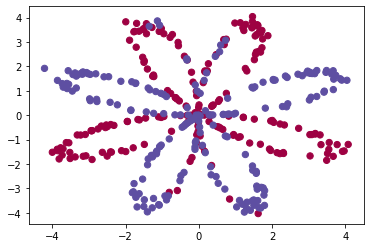

In [3]:
plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 40, cmap = plt.cm.Spectral)

In [4]:
# Train a Logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

C:\Users\007\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\007\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


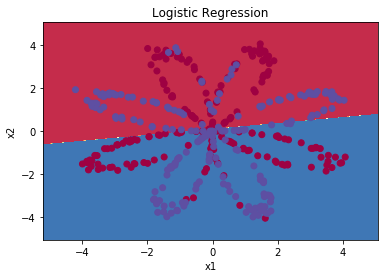

In [5]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0, :])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [6]:
def layer_sizes(X, Y) :
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [7]:
def initialize_parameters(n_x, n_h, n_y) :
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {'W1' : W1,
                  'b1' : b1,
                  'W2' : W2,
                  'b2' : b2}
    
    return parameters

In [8]:
def sigmoid(z) :
    
    return 1 / (1 + np.exp(-z))

In [9]:
def forward_propagation(X, parameters) :
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {'Z1': Z1,
             'A1': A1,
             'Z2': Z2,
             'A2': A2}
    
    return A2, cache

In [10]:
def compute_cost(A2, Y) :
    
    cost = (-1 / m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    cost = float(np.squeeze(cost))
    
    return cost

In [11]:
def backward_propagation(parameters, cache, X) :
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {'dW1': dW1,
             'db1': db1,
             'dW2': dW2,
             'db2': db2}
    
    return grads

In [12]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    
    return parameters

In [13]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False) :
    
    n_x, n_H, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations) :
        
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0 :
            print (f"Cost after iteration {i}: {cost}")
            
    return parameters

In [14]:
def predict(parameters, X) :
    
    A2, cache = forward_propagation(X, parameters)
    
    predictions = np.round(A2)
    
    return predictions

Cost after iteration 0: 0.6931125167719424
Cost after iteration 1000: 0.28257810627095964
Cost after iteration 2000: 0.2697771489412197
Cost after iteration 3000: 0.26231806209753844
Cost after iteration 4000: 0.24122763763977173
Cost after iteration 5000: 0.22602306763242702
Cost after iteration 6000: 0.22162096031401773
Cost after iteration 7000: 0.21890721724721857
Cost after iteration 8000: 0.21688489461015498
Cost after iteration 9000: 0.21525972814605293


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

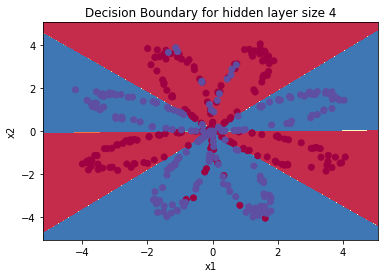

In [15]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost = True)

plot_decision_boundary(lambda x : predict(parameters, x.T), X, Y[0, :])
plt.title("Decision Boundary for hidden layer size 4")

In [16]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5
Accuracy for 2 hidden units: 67.25
Accuracy for 3 hidden units: 90.75
Accuracy for 4 hidden units: 90.5
Accuracy for 5 hidden units: 90.5
Accuracy for 20 hidden units: 91.0
Accuracy for 50 hidden units: 91.0


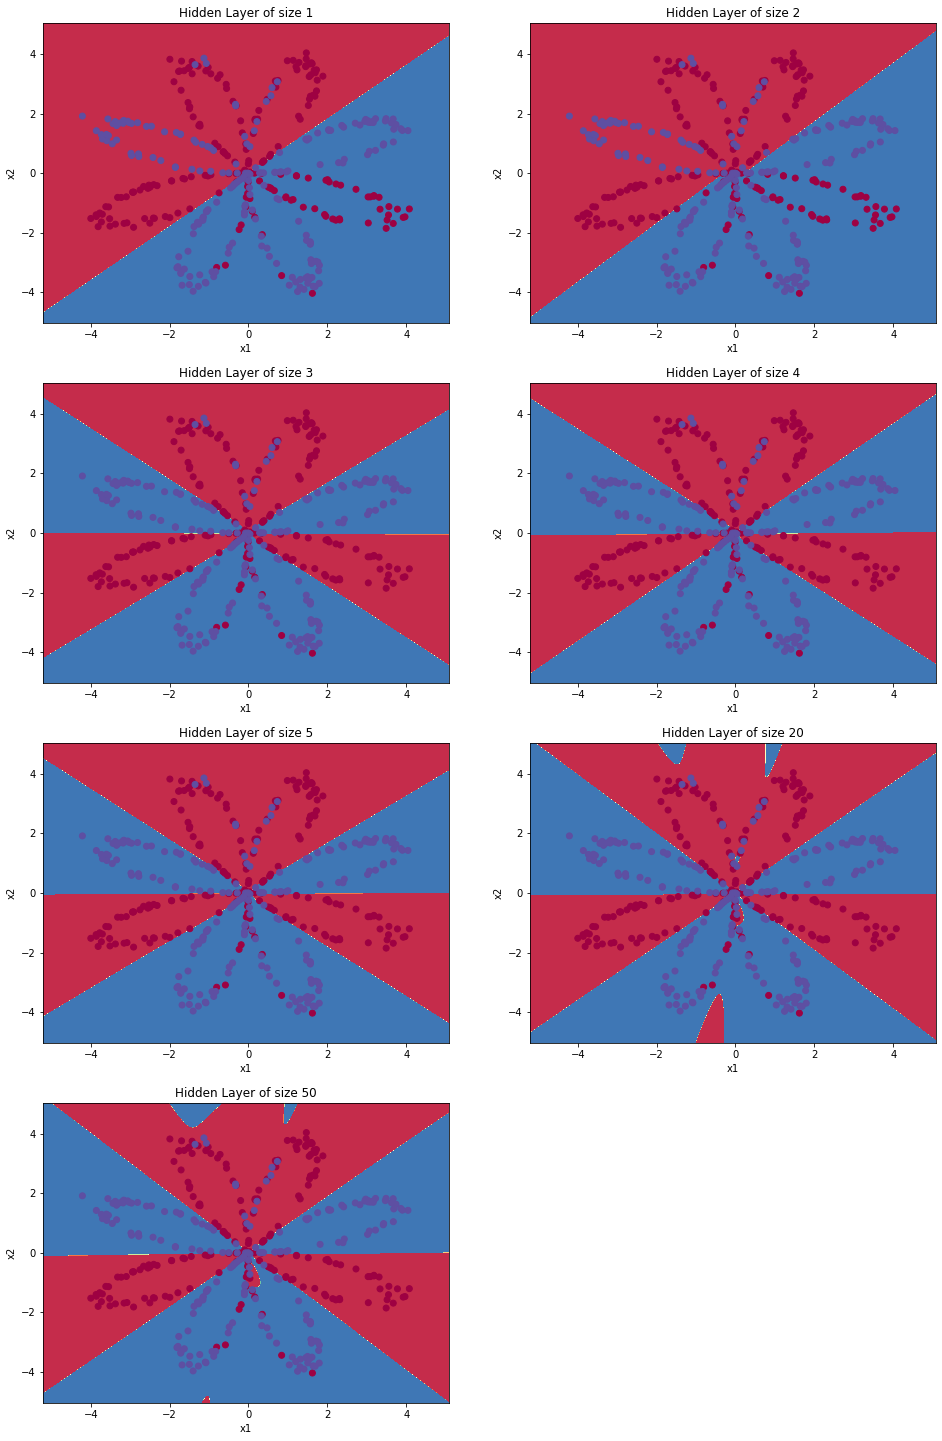

In [17]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0, :])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print (f"Accuracy for {n_h} hidden units: {accuracy}")

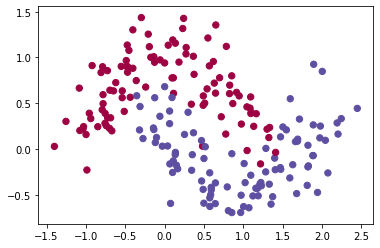

In [18]:
# Additional Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2
    
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);